# Supervised Learning
## Classification Problem
##### Problem Statement
##### What is the target and what are the features
##### Read the data
##### Check the data randomly
##### Check the no of examples or obseravtions 
##### Check the features. How many of them are categorical and numerical?
##### Datacleaning - check the missing values and replace or remove them.
##### Check the target distribution whether it is a balanced data or not
##### Seperate the target and features i.e X,y
##### Check the numerical data for skewness if there are skewed columns apply Logarithemic
##### Apply scaling for numerical columns
##### Apply one hot encoder for categorical columns
##### Divide the data for training and testing
##### Select atleast two suitable ML models
##### Choose the metric based on the problem and target distribution
##### Apply the ML models check the metric for both train and test data
##### Compare the result choose the best
##### Apply hyper parameter tuning using Gridserach
##### Get the best params from grid search and caluculate the metric value for test data.
##### Compare the gridsearch result with default model result

In [14]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/sumathi16/ML_FDP_GEC_2019/master/census.csv')

In [15]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [16]:
new_df = data.copy()

In [17]:
new_df.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [18]:
import numpy as np
new_df['capital-loss'] = np.log1p(new_df['capital-loss'])
new_df['capital-loss'][:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: capital-loss, dtype: float64

In [19]:
new_df['capital-loss'].min(),data['capital-loss'].min()

(0.0, 0.0)

In [20]:
new_df['capital-loss'].max(),data['capital-loss'].max()

(8.379539026117442, 4356.0)

In [21]:
new_df['capital-gain'] = np.log1p(new_df['capital-gain'])
new_df['capital-gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        9.552866
9        8.552367
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
           ...   
45192    0.000000
45193    0.000000
45194    0.000000
45195    8.947546
45196    0.000000
45197    0.000000
45198    0.000000
45199    0.000000
45200    0.000000
45201    0.000000
45202    0.000000
45203    0.000000
45204    9.617471
45205    0.000000
45206    0.000000
45207    0.000000
45208    0.000000
45209    0.000000
45210    0.000000
45211    0.000000
45212    0.000000
45213    0.000000
45214    0.000000
45215    0.000000
45216    0

In [23]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [25]:
data.dtypes != object

age                 True
workclass          False
education_level    False
education-num       True
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain        True
capital-loss        True
hours-per-week      True
native-country     False
income             False
dtype: bool

In [26]:
data.columns[data.dtypes != object]

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [27]:
ncols = data.columns[data.dtypes != object]
ncols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [56]:
y = new_df.income

In [28]:
# Sepearting the features an target
y = new_df.income # target 
x = new_df.drop('income',axis=1) # features other than income col
print(x.shape,y.shape)

(45222, 13) (45222,)


In [29]:
# Check the top five rows in x
x.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba


In [30]:
# statistical description for numerical data
x.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,0.740759,0.355489,40.938017
std,13.217870,2.552881,2.466527,1.595914,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000


In [31]:
# Access the numerical Columns only
x[ncols]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,7.684784,0.000000,40.0
1,50,13.0,0.000000,0.000000,13.0
2,38,9.0,0.000000,0.000000,40.0
3,53,7.0,0.000000,0.000000,40.0
4,28,13.0,0.000000,0.000000,40.0
5,37,14.0,0.000000,0.000000,40.0
6,49,5.0,0.000000,0.000000,16.0
7,52,9.0,0.000000,0.000000,45.0
8,31,14.0,9.552866,0.000000,50.0
9,42,13.0,8.552367,0.000000,40.0


In [32]:
# Normalizing the numerical columns
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x[ncols] = sc.fit_transform(x[ncols])
x.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.064342,0.042423,0.407531
std,0.181067,0.170192,0.214240,0.190454,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y.nunique()

2

In [38]:
y.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [39]:
y[:5]

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [33]:
# one hot encoder for categorical columns
pd.get_dummies(y)

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [35]:
pd.get_dummies(x.sex)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [40]:
x['marital-status'].nunique()

7

In [41]:
x['marital-status'][:5]

0          Never-married
1     Married-civ-spouse
2               Divorced
3     Married-civ-spouse
4     Married-civ-spouse
Name: marital-status, dtype: object

In [36]:
pd.get_dummies(x['marital-status'])

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0


In [42]:
x = pd.get_dummies(x)
x.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=103)

In [50]:
x.dtypes

age                                           float64
education-num                                 float64
capital-gain                                  float64
capital-loss                                  float64
hours-per-week                                float64
workclass_ Federal-gov                          uint8
workclass_ Local-gov                            uint8
workclass_ Private                              uint8
workclass_ Self-emp-inc                         uint8
workclass_ Self-emp-not-inc                     uint8
workclass_ State-gov                            uint8
workclass_ Without-pay                          uint8
education_level_ 10th                           uint8
education_level_ 11th                           uint8
education_level_ 12th                           uint8
education_level_ 1st-4th                        uint8
education_level_ 5th-6th                        uint8
education_level_ 7th-8th                        uint8
education_level_ 9th        

In [57]:
y[11]

'>50K'

In [58]:
y = y.apply(lambda x: 1 if x=='>50K' else 0)
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
45192    0
45193    0
45194    1
45195    1
45196    0
45197    1
45198    1
45199    0
45200    0
45201    0
45202    0
45203    0
45204    1
45205    0
45206    0
45207    0
45208    0
45209    0
45210    0
45211    0
45212    0
45213    0
45214    0
45215    0
45216    0
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

In [62]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42)
xtrain.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
33844,0.109589,0.600000,0.667492,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21368,0.356164,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4335,0.068493,0.666667,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27310,0.027397,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13862,0.041096,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Check the shape of the train and test data
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(33916, 103)
(33916,)
(11306, 103)
(11306,)


In [64]:
y.value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

In [65]:
ytrain.value_counts(normalize=True)

0    0.753568
1    0.246432
Name: income, dtype: float64

In [66]:
ytest.value_counts(normalize=True)

0    0.747921
1    0.252079
Name: income, dtype: float64

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
from sklearn.metrics import accuracy_score
y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)
print('training score --',accuracy_score(ytrain,y_pred_train))
print('testing score --',accuracy_score(ytest,y_pred_test))

training score -- 0.8418740417502064
testing score -- 0.8444188926233858


In [69]:
from sklearn.metrics import f1_score
print('training f1 score --',f1_score(ytrain,y_pred_train))
print('testing f1 score --',f1_score(ytest,y_pred_test))

training f1 score -- 0.6482586738374763
testing f1 score -- 0.6569143748780963


In [70]:
from sklearn.metrics import precision_score
print('training f1 score --',precision_score(ytrain,y_pred_train))
print('testing f1 score --',precision_score(ytest,y_pred_test))

training f1 score -- 0.7173755262011903
testing f1 score -- 0.7395696091348265


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
knn_ytrain_pred = knn.predict(xtrain)
knn_ytest_pred = knn.predict(xtest)

In [73]:
print('knn training score --',\
      accuracy_score(ytrain,knn_ytrain_pred))
print('knn testing score --', \
      accuracy_score(ytest,knn_ytest_pred))

knn training score -- 0.8733636041986084
knn testing score -- 0.8252255439589599


In [74]:
print('knn training f1 score --',\
      f1_score(ytrain,knn_ytrain_pred))
print('knn testing f1 score --', \
      f1_score(ytest,knn_ytest_pred))

knn training f1 score -- 0.7289365730514358
knn testing f1 score -- 0.6261823685206206


In [75]:
dtrain ={}
dtest ={}
for i in range(2,16,2):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(xtrain,ytrain)
    train_pred = knn1.predict(xtrain)
    test_pred = knn1.predict(xtest)
    dtrain[i] = f1_score(train_pred,ytrain)
    dtest[i] = f1_score(test_pred,ytest)

In [76]:
dtrain

{2: 0.7150897474901124,
 4: 0.6936597167864513,
 6: 0.6867528159767811,
 8: 0.6782394751230181,
 10: 0.6758965354224353,
 12: 0.6697130569182178,
 14: 0.6660405205957333}

In [77]:
dtest

{2: 0.5259159964253798,
 4: 0.5679949399114484,
 6: 0.6004911993450676,
 8: 0.6059253246753247,
 10: 0.6138374899436846,
 12: 0.618371022613568,
 14: 0.6197634796552415}

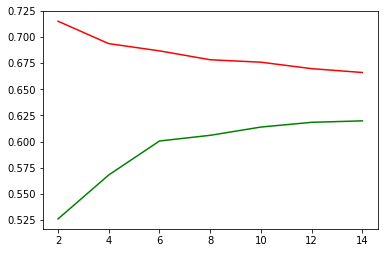

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(dtrain.keys()),list(dtrain.values()),'r')
plt.plot(list(dtest.keys()),list(dtest.values()),'g')

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
dtc_ytrain_pred = dtc.predict(xtrain)
dtc_ytest_pred = dtc.predict(xtest)

In [87]:
print('dtc training f1 score --',\
      f1_score(ytrain,dtc_ytrain_pred))
print('dtc testing f1 score --', \
      f1_score(ytest,dtc_ytest_pred))

dtc training f1 score -- 0.9429884486399206
dtc testing f1 score -- 0.6295304409926799


<BarContainer object of 3 artists>

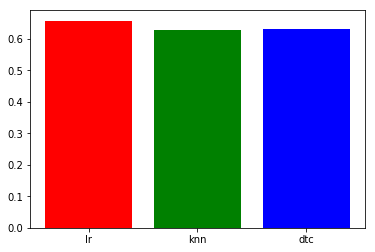

In [94]:
dfscore = f1_score(ytest,dtc_ytest_pred)
lfscore = f1_score(ytest,y_pred_test)
kfscore = f1_score(ytest,knn_ytest_pred)
plt.bar(['lr','knn','dtc'],[lfscore,kfscore,dfscore],\
        color =['r','g','b'])

In [95]:
#('l1',1),('l2',1),('elasticnet',1)
#penalty = [l1,l2,elasticnet]
# c =[1,0.01,0.5,8,10,0.25]

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
lr1 = LogisticRegression()
params = {'penalty':['l1','l2'],
         'C':[8,9,11,12,16]}
scoring = make_scorer(f1_score)
grid = GridSearchCV(lr1,params,scoring,cv = 5)
grid.fit(xtrain,ytrain)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [8, 9, 11, 12, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=0)

In [102]:
grid.best_estimator_

LogisticRegression(C=11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
f1_score(ytest,grid.predict(xtest))

0.6562743569758379